In [76]:
import os,warnings;warnings.filterwarnings("ignore")
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [77]:
data = pd.read_csv('Regression_QSAR_Bioconcentration.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


In [78]:
data.drop(['SMILES'], axis = 1, inplace = True)
data.drop(['Set'], axis=1, inplace=True)
data.drop(['CAS'], axis=1, inplace=True)
data.drop(['Class'], axis=1, inplace=True)
data.head()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],logBCF
0,0,0.0,1.49,0.14,1.35,0.72,0,1,5,0.74
1,0,0.0,1.47,0.14,1.70,0.88,0,1,5,0.93
2,0,0.0,1.20,0.25,4.14,2.06,0,0,0,3.24
3,0,0.0,1.69,0.13,1.89,0.79,0,1,8,-0.40
4,0,0.0,0.52,0.25,2.65,1.31,0,0,0,2.24


In [79]:
data.corr()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],logBCF
nHM,1.000000,0.111342,-0.025441,0.203271,0.409056,-0.234624,-0.066342,-0.269776,-0.132241,0.463748
piPC09,0.111342,1.000000,0.740393,-0.272374,0.513952,0.451541,0.126526,0.050194,0.259653,0.440484
PCD,-0.025441,0.740393,1.000000,-0.442556,0.454225,0.119992,-0.033546,0.102492,0.107124,0.364646
X2Av,0.203271,-0.272374,-0.442556,1.000000,-0.118856,0.037763,-0.058784,-0.224941,-0.111929,-0.044699
MLOGP,0.409056,0.513952,0.454225,-0.118856,1.000000,0.246305,-0.203734,-0.346372,-0.098640,0.793099
ON1V,-0.234624,0.451541,0.119992,0.037763,0.246305,1.000000,0.211816,0.147121,0.520896,0.140240
N-072,-0.066342,0.126526,-0.033546,-0.058784,-0.203734,0.211816,1.000000,0.375869,0.176938,-0.184886
B02[C-N],-0.269776,0.050194,0.102492,-0.224941,-0.346372,0.147121,0.375869,1.000000,0.230493,-0.331069
F04[C-O],-0.132241,0.259653,0.107124,-0.111929,-0.098640,0.520896,0.176938,0.230493,1.000000,-0.130938
logBCF,0.463748,0.440484,0.364646,-0.044699,0.793099,0.140240,-0.184886,-0.331069,-0.130938,1.000000


In [80]:
x = data.drop(['logBCF'], axis =1)
y = data.logBCF.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [81]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [82]:
scaler =StandardScaler()
scaler

StandardScaler()

In [98]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [99]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [100]:
mlr.predict(x_train)
y_predict_test=mlr.predict(x_test)

In [101]:
#Performance 
VAR = metrics.explained_variance_score(y_test, y_predict_test)
MSE = metrics.mean_squared_error(y_test, y_predict_test)
R2 = metrics.r2_score(y_test, y_predict_test)

In [102]:
print('Explained Variance:', VAR)
print('Mean Square Error:', MSE)
print('R-Squared', R2)


Explained Variance: 0.6156470996852812
Mean Square Error: 0.6814697202762693
R-Squared 0.6156404110085312


Text(0.5, 1.0, 'Linear Regression Model')

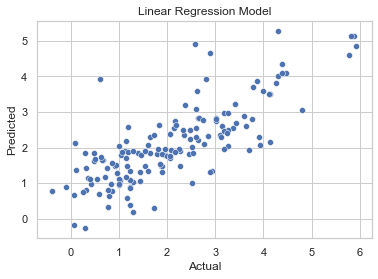

In [103]:
sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression Model")

In [104]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [105]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [112]:
regressor.predict(x_train)
predicted = regressor.predict(x_test)
VAR = metrics.explained_variance_score(y_test, predicted)
MSE = metrics.mean_squared_error(y_test, predicted)
R2 = metrics.r2_score(y_test, predicted)
print('Explained Variance:', VAR)
print('Mean Square Error:', MSE)
print('R-Squared', R2)

Explained Variance: 0.4560263195850349
Mean Square Error: 0.98437792022792
R-Squared 0.44479544494259515


Text(0.5, 1.0, 'Decision Tree Regression Model')

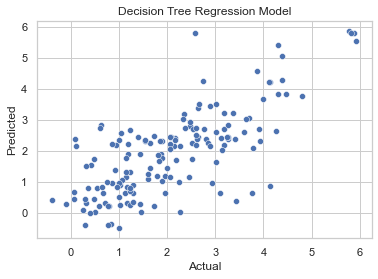

In [113]:
sns.scatterplot(y_test,predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Decision Tree Regression Model")

In [124]:
#Elastic Net
from sklearn.linear_model import ElasticNet

In [123]:
regr = ElasticNet()
regr.fit(x_train, y_train)

ElasticNet()

In [125]:
regr.predict(x_train)
y_predicted = regr.predict(x_test)
VAR = metrics.explained_variance_score(y_test, y_predicted)
MSE = metrics.mean_squared_error(y_test, y_predicted)
R2 = metrics.r2_score(y_test, y_predicted)
print('Explained Variance:', VAR)
print('Mean Square Error:', MSE)
print('R-Squared', R2)

Explained Variance: 0.3472792273020452
Mean Square Error: 1.1574615604117031
R-Squared 0.34717356267434685


Text(0.5, 1.0, 'Decision Tree Regression Model')

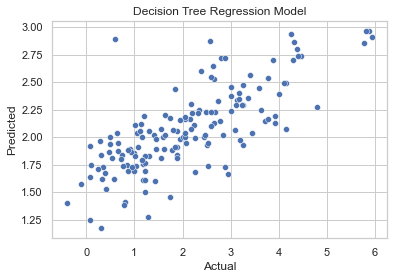

In [127]:
sns.scatterplot(y_test,y_predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Decision Tree Regression Model")